 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [88]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

import os

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [89]:
# Reading whale returns

Whale_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\Pandas\Resources\whale_returns.csv')
print(Whale_Returns)

            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                             NaN                     NaN  
1                       -0.000496               -0.006569  
2              

In [90]:
# Count nulls

Whale_Returns.isnull().sum(axis = 0)


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [91]:
# Drop nulls

Whale_Returns=Whale_Returns.dropna()

Whale_Returns.isnull().sum(axis=0)


Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [92]:
# Reading algorithmic returns

Algo_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\Pandas\Resources\algo_returns.csv')
print(Algo_Returns)

            Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]


In [93]:
# Count nulls
Algo_Returns.isnull().sum(axis = 0)

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [94]:
# Drop nulls
Algo_Returns=Algo_Returns.dropna()
Algo_Returns.isnull().sum(axis = 0)

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [95]:
# Reading S&P 500 Closing Prices
SP500_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\Pandas\Resources\sp500_history.csv')
print(SP500_Returns)

           Date     Close
0     23-Apr-19  $2933.68
1     22-Apr-19  $2907.97
2     18-Apr-19  $2905.03
3     17-Apr-19  $2900.45
4     16-Apr-19  $2907.06
...         ...       ...
1644   5-Oct-12  $1460.93
1645   4-Oct-12  $1461.40
1646   3-Oct-12  $1450.99
1647   2-Oct-12  $1445.75
1648   1-Oct-12  $1444.49

[1649 rows x 2 columns]


In [96]:
# Check Data Types
SP500_Returns.dtypes

Date     object
Close    object
dtype: object

In [97]:
# Fix Data Types
SP500_Returns["Close"] = SP500_Returns["Close"].str.replace("$","")

SP500_Returns["Close"] = SP500_Returns["Close"].astype("float")

C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [171]:
# Calculate Daily Returns
SP500_Returns = SP500_Returns['Close'].pct_change()

KeyError: 'Close'

In [99]:
# Drop nulls
SP500_Returns = SP500_Returns.dropna()
SP500_Returns.isnull().sum(axis = 0)

0

In [100]:
# Rename `Close` Column to be specific to this portfolio.


In [162]:
SP500_Returns = SP500_Returns.rename(columns={'Close': 'SP500_Close'})

SP500_Returns.rename(columns={'Close': 'SP500_Close'}, inplace=True)

print(SP500_returns)

TypeError: rename() got an unexpected keyword argument 'columns'

## Combine Whale, Algorithmic, and S&P 500 Returns

In [102]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Total_Returns = pd.concat([Whale_Returns, Algo_Returns, SP500_Returns],axis="columns",join="inner") 

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Total Returns'}, xlabel='Date', ylabel='Close'>

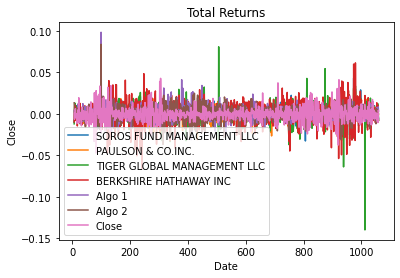

In [103]:
# Plot daily returns of all portfolios
Total_Returns.plot(title='Total Returns', xlabel='Date', ylabel="Close")

#### Calculate and Plot cumulative returns.

In [104]:
# Calculate cumulative returns of all portfolios
Cumulative_Returns = (1 + Total_Returns).cumprod()
# Plot cumulative returns


TypeError: unsupported operand type(s) for +: 'int' and 'str'

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


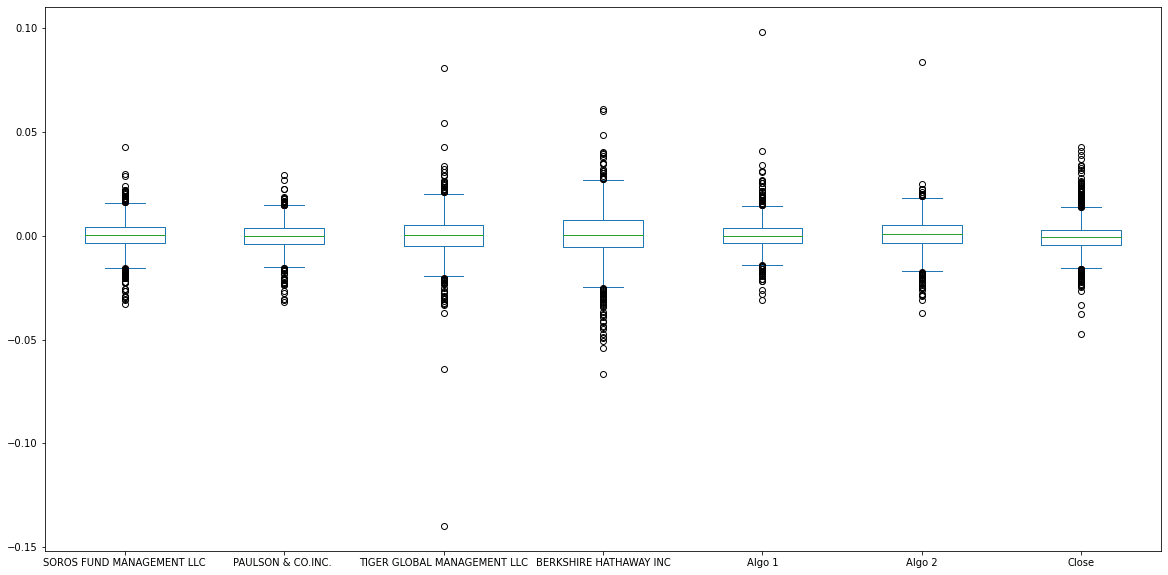

In [105]:
# Box plot to visually show risk
Total_Returns.plot.box(figsize=(20,10))
plt.show()

### Calculate Standard Deviations

In [106]:
# Calculate the daily standard deviations of all portfolios
Total_Returns.std

<bound method NDFrame._add_numeric_operations.<locals>.std of             Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
6     2015-03-10                  -0.010263           -0.005341   
7     2015-03-11                   0.004012            0.005163   
8     2015-03-12                   0.008265            0.010272   
9     2015-03-13                  -0.002497           -0.001428   
10    2015-03-16                   0.007901            0.003583   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC        Date  \
6                       -0.012079               -0.009739  2

### Determine which portfolios are riskier than the S&P 500

In [107]:
# Calculate  the daily standard deviation of S&P 500
SP500_Returns.std

# Determine which portfolios are riskier than the S&P 500
Total_Returns.std()>SP500_Returns.std()

C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
Close                           True
dtype: bool

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized standard deviation (252 trading days)
Total_Returns.std()* np.sqrt(252)

C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
Close                          0.135777
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

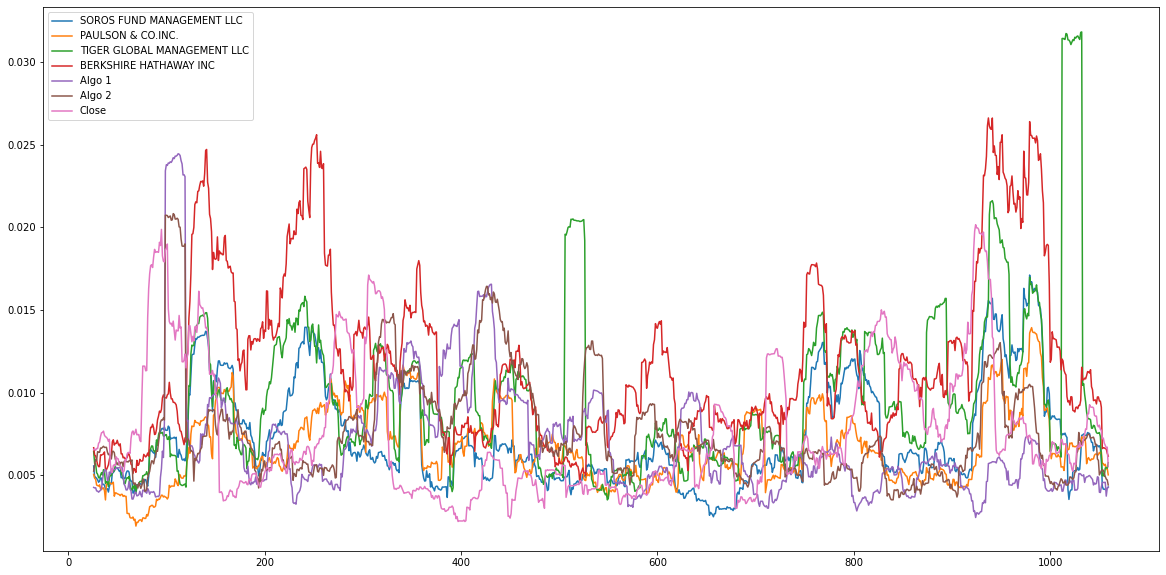

In [109]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_STD=Total_Returns.rolling(window=21).std()


# Plot the rolling standard deviation
Rolling_STD.plot(figsize = (20,10))

### Calculate and plot the correlation

In [110]:
import seaborn as sn
import matplotlib.pyplot as plt

# Calculate the correlation
correlation = Total_Returns.corr()

# Display de correlation matrix
corrMatrix = Total_Returns.corr()
corrMatrix.style.background_gradient(cmap="summer")


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091,-0.036216
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532,-0.020471
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470,0.032741
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006,-0.002710
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996,-0.020353
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000,-0.028751
Close,-0.036216,-0.020471,0.032741,-0.002710,-0.020353,-0.028751,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

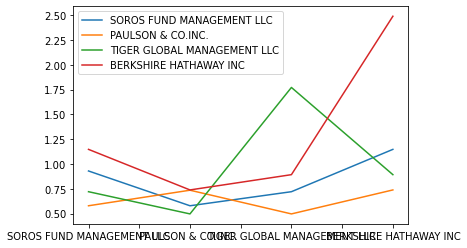

In [111]:
# Calculate covariance of a single portfolio
Whale_Returns.cov()
# Calculate variance of S&P 500
SP500_Returns.var()
# Computing beta
beta = Whale_Returns.cov()/SP500_Returns.var()
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}>

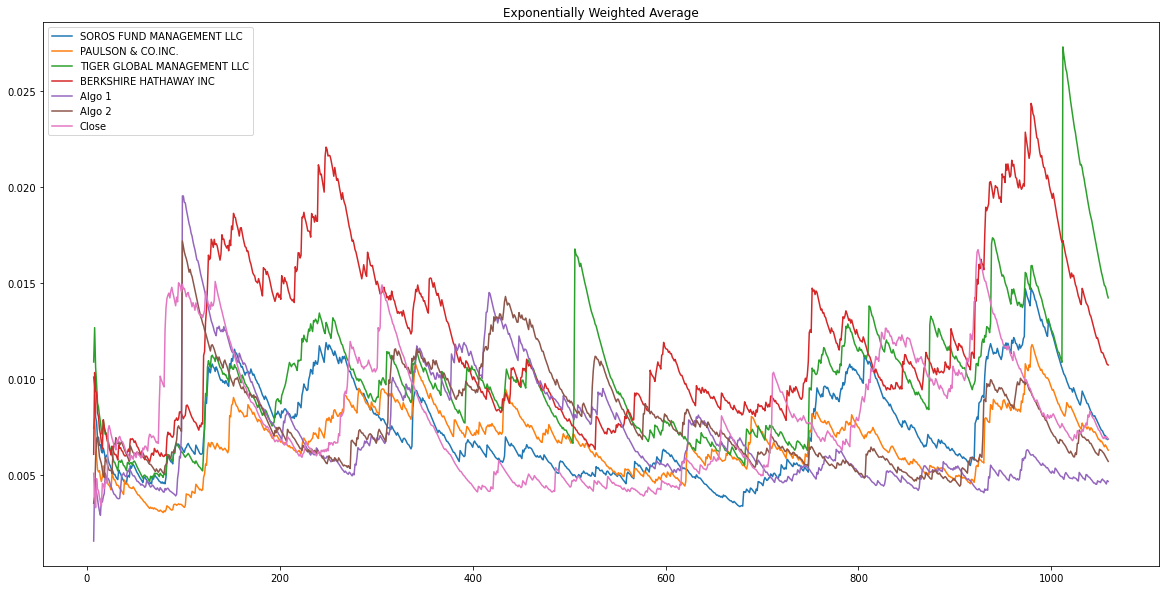

In [112]:
# Use `ewm` to calculate the rolling window
Total_Returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Annualized Sharpe Ratios
sharpe_ratio = (Total_Returns.mean()*252)/(Total_Returns.std()*252)
sharpe_ratio

C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


SOROS FUND MANAGEMENT LLC      0.023129
PAULSON & CO.INC.             -0.029610
TIGER GLOBAL MANAGEMENT LLC   -0.007181
BERKSHIRE HATHAWAY INC         0.039924
Algo 1                         0.067450
Algo 2                         0.050683
Close                         -0.033748
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

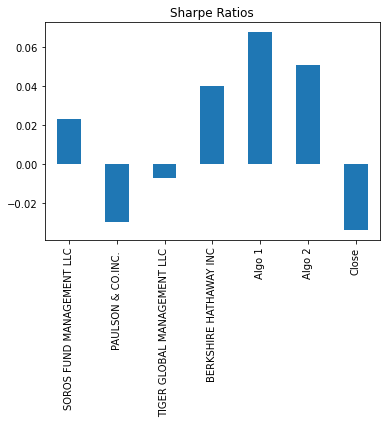

In [114]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 and Algo 2 do outperform the market and whale portfolios. 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [156]:
# Reading data from 1st stock
Square_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\Class Work\Square_Returns.csv')
Square_Returns = Square_Returns.rename(columns={'Close': 'SQ'})

Square_Returns.rename(columns={'Close': 'SQ'}, inplace=True)
print(Square_Returns)

         Date      SQ
0      1/2/19   57.20
1      1/3/19   52.42
2      1/4/19   58.18
3      1/7/19   60.72
4      1/8/19   63.12
..        ...     ...
499  12/23/20  230.68
500  12/24/20  228.28
501  12/28/20  223.34
502  12/29/20  214.00
503  12/30/20  221.04

[504 rows x 2 columns]


In [157]:
# Reading data from 2nd stock
AAPL_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\Class Work\Apple_Returns.csv')
AAPL_Returns = AAPL_Returns.rename(columns={'Close': 'AAPL'})

AAPL_Returns.rename(columns={'Close': 'AAPL'}, inplace=True)
print(AAPL_Returns)


         Date    AAPL
0      1/2/19   39.48
1      1/3/19   35.55
2      1/4/19   37.07
3      1/7/19   36.98
4      1/8/19   37.69
..        ...     ...
499  12/23/20  130.96
500  12/24/20  131.97
501  12/28/20  136.69
502  12/29/20  134.87
503  12/30/20  133.72

[504 rows x 2 columns]


In [160]:
# Reading data from 3rd stock
Fox_Returns = pd.read_csv(r'C:\Users\bobdi\Desktop\Class Work\Fox_Returns.csv')
Fox_Returns = Fox_Returns.rename(columns={'Close': 'FOX'})

Fox_Returns.rename(columns={'Close': 'FOX'}, inplace=True)
print(Fox_Returns)


         Date    FOX
0     3/13/19  28.75
1     3/14/19  29.31
2     3/15/19  30.08
3     3/18/19  29.97
4     3/19/19  39.55
..        ...    ...
451  12/23/20  27.75
452  12/24/20  28.00
453  12/28/20  28.88
454  12/29/20  28.79
455  12/30/20  28.70

[456 rows x 2 columns]


In [165]:
# Combine all stock in a single DataFram
My_Total_Returns = pd.concat([Square_Returns, AAPL_Returns, Fox_Returns],axis="columns",join="inner") 

In [166]:
# Reset Date index
My_Total_Returns.reset_index(drop=True)

,Date,SQ,Date,AAPL,Date,FOX
0,1/2/19,57.20,1/2/19,39.48,3/13/19,28.75
1,1/3/19,52.42,1/3/19,35.55,3/14/19,29.31
2,1/4/19,58.18,1/4/19,37.07,3/15/19,30.08
3,1/7/19,60.72,1/7/19,36.98,3/18/19,29.97
4,1/8/19,63.12,1/8/19,37.69,3/19/19,39.55
...,...,...,...,...,...,...
451,10/15/20,188.60,10/15/20,120.71,12/23/20,27.75
452,10/16/20,186.35,10/16/20,119.02,12/24/20,28.00
453,10/19/20,186.96,10/19/20,115.98,12/28/20,28.88
454,10/20/20,185.74,10/20/20,117.51,12/29/20,28.79


In [167]:
# Reorganize portfolio data by having a column per symbol
# Did above already

In [177]:
# Calculate daily returns
Square_Returns = Square_Returns['SQ'].pct_change()
AAPL_Returns = AAPL_Returns['AAPL'].pct_change()
Fox_Returns = Fox_Returns['FOX'].pct_change()
# Drop NAs
My_Total_Returns = My_Total_Returns.dropna()
My_Total_Returns.isnull().sum(axis = 0)
# Display sample data


0

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [178]:
# Calculate the annualized `std`
My_Total_Returns.std

<bound method NDFrame._add_numeric_operations.<locals>.std of 1     -0.083566
2      0.109882
3      0.043658
4      0.039526
5      0.044518
         ...   
451    0.005920
452   -0.011930
453    0.003273
454   -0.006525
455   -0.042640
Name: SQ, Length: 455, dtype: float64>

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

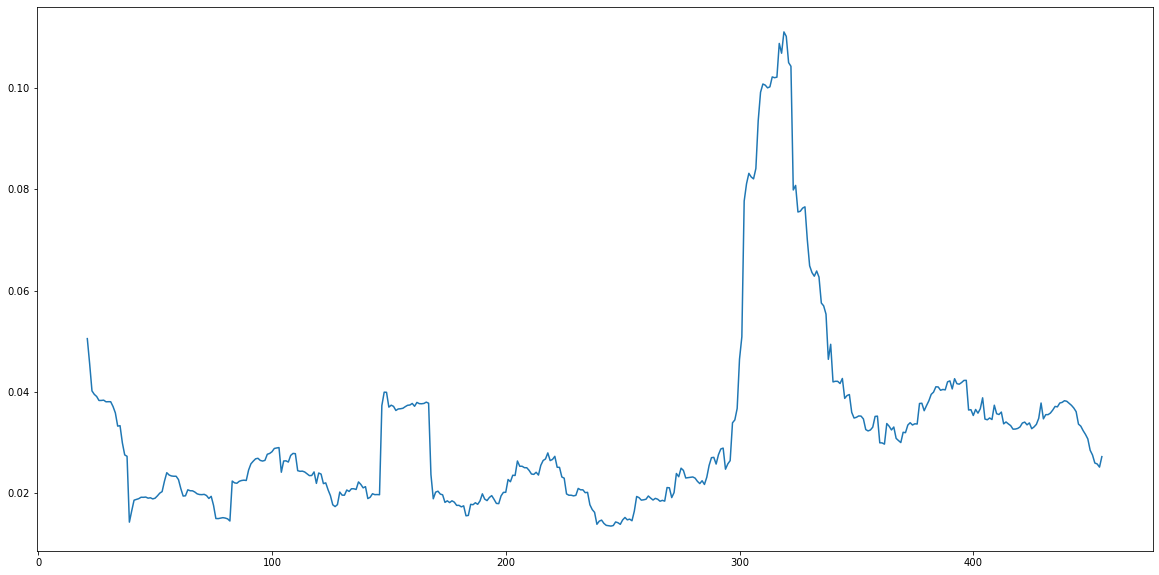

In [179]:
# Calculate rolling standard deviation
Rolling_STD= My_Total_Returns.rolling(window=21).std()


# Plot the rolling standard deviation
Rolling_STD.plot(figsize = (20,10))



### Calculate and plot the correlation

In [186]:
# Calculate and plot the correlation
correlation = My_Total_Returns.corr()

# Display de correlation matrix
corrMatrix = My_Total_Returns.corr()
corrMatrix.style.background_gradient(cmap="summer")

TypeError: corr() missing 1 required positional argument: 'other'

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [187]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
My_Total_Returns.cov()
# Calculate variance of S&P 500
SP500_Returns.var()
# Computing beta
beta = My_Total_Returns.cov()/SP500_Returns.var()
# Plot beta trend
beta.plot()

TypeError: cov() missing 1 required positional argument: 'other'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [190]:
# Calculate Annualized Sharpe Ratios

my_sharpe_ratio = (My_Total_Returns.mean()*252)/(My_Total_Returns.std()*252)
my_sharpe_ratio

0.08596310299582728

In [191]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

AttributeError: 'float' object has no attribute 'plot'

### How does your portfolio do?

Write your answer here!